## Models Testing and comparaisons

In [1]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import _tree
from sklearn.metrics import confusion_matrix

from FCM_SS_2_noidx import FCM_SS_2_noidx

import matplotlib.pyplot as plt
import itertools
import copy
import numpy as np

DATASETS_PATHS = ['datasets/melanomaTest.dat.csv', 'datasets/seeds_dataset.csv'] # http://cibcb.org/data/

%matplotlib inline

/home/arthur/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Loading datasets

In [2]:
def loadDataset(filename):
    dataset = np.genfromtxt(filename, delimiter=';')
    
    # save all the labels to calculate the performance of our algorithm
    true_labels = copy.copy(dataset[:, -1])
    labels_names = np.unique(true_labels)
    
    return dataset, true_labels, labels_names

DATASETS = []
for path in DATASETS_PATHS:
    DATASETS.append(loadDataset(path))

index_dataset = 1
percentage_ommission = 90
dataset = DATASETS[index_dataset][0]
true_labels = DATASETS[index_dataset][1]
labels_names = DATASETS[index_dataset][2]

## Remove some labels

In [3]:
def removeLabels(dataset, labels_name, percentage):
    col = np.zeros((len(dataset), 1), float)
    for i in range(len(dataset)):
        col[i] = dataset[i][-1]

    dataset = np.append(dataset, np.asarray(col), axis = 1)
    result = copy.copy(dataset)
    # remove percentage of each different labels for test purpose       
    for label in labels_name:
        subArrayIdx = np.where(result[:,-2] == label)[0]
        if len(subArrayIdx):
            idx = np.random.choice(subArrayIdx, int(len(subArrayIdx)*percentage/100), replace=False)
            for i in idx:
                result[i][-2] = 0
            

    return result


dataset = removeLabels(dataset, labels_names, 90)


## Perform Tests

In [5]:
fcm = FCM_SS_2_noidx() 
fcm.setParams(fuzzy_param=2, membership_threshold=0.95)
new_data, labels, centers, mb = fcm.clusterize(dataset, DATASETS[1][2])

### Confusion Matrix and scores

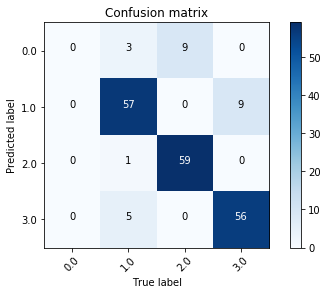

In [6]:

conf_mat = confusion_matrix(labels, [row[-1] for row in new_data])


def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    ref_labels = np.append([0.],DATASETS[1][2] )
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(ref_labels))
    plt.xticks(tick_marks, ref_labels, rotation=45)
    plt.yticks(tick_marks, ref_labels)
    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
plot_confusion_matrix(conf_mat)

In [7]:
print("Accuracy:", accuracy_score(labels, [row[-1] for row in new_data]))
precision = (conf_mat[0][0]/(conf_mat[0][0] + conf_mat[1][0]) + conf_mat[1][1]/(conf_mat[1][1] + conf_mat[0][1]))/2
print("Precision: ", precision)
recall = (conf_mat[0][0]/(conf_mat[0][0] + conf_mat[0][1]) + conf_mat[1][1]/(conf_mat[1][1] + conf_mat[1][0]))/2
print("Recall: ", recall)
f1score = 2*(precision*recall)/(precision+recall)
print("F1-Score: ", f1score)

Accuracy: 0.864321608040201
Precision:  nan
Recall:  0.5
F1-Score:  nan


/home/arthur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


199
199
0.9045226130653267


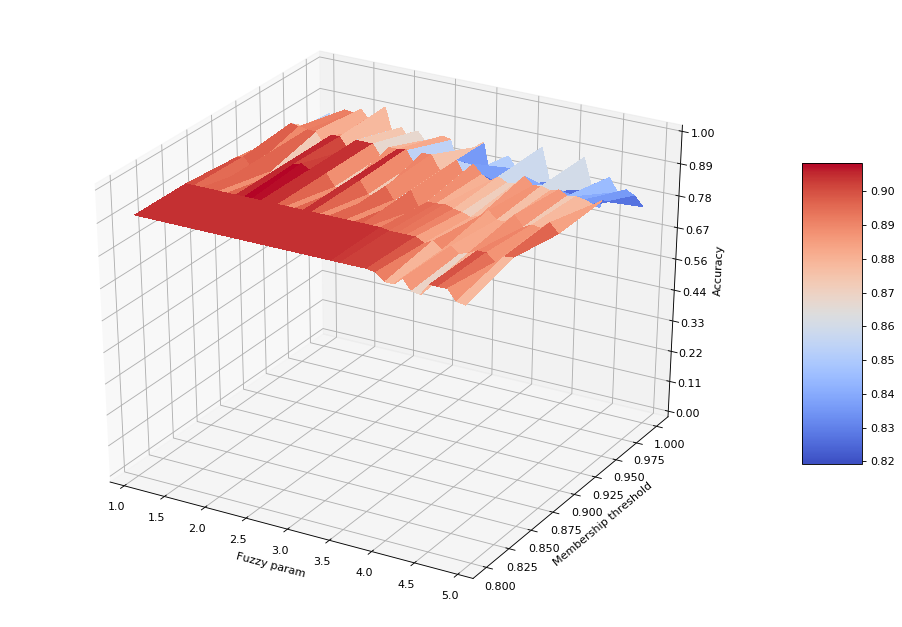

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


#dataset = DATASETS[1][0]
#true_labels = DATASETS[1][1]
#labels_names = DATASETS[1][2]
print(len(true_labels))
print(len(labels))
fuzzy_params = np.arange(1.1,5,0.1)
mb_threshold_values = np.arange(0.8,1.05,0.05)

def computeClustering(fuzzy_param, mb_threshold_value):
    fcm.setParams(fuzzy_param=fuzzy_param, membership_threshold=mb_threshold_value)
    new_data, labels, centers, mb = fcm.clusterize(dataset, labels_names)
    return accuracy_score(labels, [row[-1] for row in new_data])

print(computeClustering(2, 0.95))
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')

# Make data.
fuzzy_params, mb_threshold_values = np.meshgrid(fuzzy_params, mb_threshold_values)

accurencies = np.array([computeClustering(x,y) for x,y in zip(np.ravel(fuzzy_params), np.ravel(mb_threshold_values))])
accurencies = accurencies.reshape(mb_threshold_values.shape)

graph = ax.plot_surface(fuzzy_params, mb_threshold_values, accurencies, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel('Fuzzy param')
ax.set_ylabel('Membership threshold')
ax.set_zlabel('Accuracy')

# Customize the z axis.
ax.set_zlim(0, 1.00)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(graph, shrink=0.5, aspect=5)

plt.show()

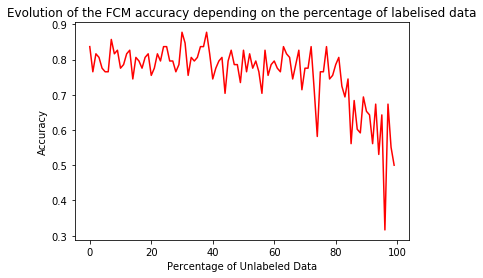

In [11]:


def computeClustering(percentageOmission):
    dataset = DATASETS[0][0]
    true_labels = DATASETS[0][1]
    labels_names = DATASETS[0][2]
    dataset = removeLabels(dataset, labels_names, percentageOmission) 
    fcm.setParams(fuzzy_param=2, membership_threshold=0.975)
    new_data, nelabels, centers, mb = fcm.clusterize(dataset, labels_names)
    return accuracy_score(nelabels, [row[-1] for row in new_data])

labelOmission = np.arange(0, 100)
accurencies = np.array([computeClustering(x) for x in labelOmission])

fig, axes = plt.subplots()

axes.plot(labelOmission, accurencies, 'r')
axes.set_xlabel('Percentage of Unlabeled Data')
axes.set_ylabel('Accuracy')
axes.set_title('Evolution of the FCM accuracy depending on the percentage of labelised data');